In [ ]:
# Librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import os

# Para estadística
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro, norm

# Para aplicar MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Para separar el dataset
from sklearn.model_selection import train_test_split

# Para oversamplear datasets desbalanceados
from imblearn.over_sampling import RandomOverSampler

# Para visualización en 2d con reducción de dimensionalidad
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Para el entrenamiento de los modelos
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin

# Para no sobreentrenar
from tensorflow.keras.callbacks import EarlyStopping

# Para usar búsqueda de hiperparámetros con TensorFlow
!pip install -q keras_tuner

import keras_tuner as kt

# Métricas para evaluar
from sklearn.metrics import (classification_report, precision_recall_curve, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay,balanced_accuracy_score)
from sklearn.model_selection import learning_curve, cross_validate

# Visualización de los árboles de decisión
!pip install -q -U dtreeviz

import dtreeviz
from xgboost import plot_tree
import logging

# Ignorar los warning
import warnings
warnings.filterwarnings('ignore')

RUBÉN LEONARDO OLIVARES GARCÍA 
CHRISTOPHER JIMENEZ ORTÍZ 
AMÉRICA VALENTINA MORENO CRUZ
ALEJANDRA LIZBETH RAMIREZ AGUILAR

In [2]:
# Fijar la semilla para garantizar reproducibilidad
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
seed = 42

os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Extracción de la base de datos
base de datos cargada directamente de github

In [3]:
# Cargando el dataset
!wget https://raw.githubusercontent.com/plotly/datasets/502daad486f112310367a20a74a00a9cc6e75240/diabetes.csv

df = pd.read_csv('diabetes.csv')

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Representación de los datos
<table>
<thead>
<tr>
<th>Columna</th>
<th>Descripción</th>
<th>Unidad</th>
<th>Aclaración</th>
</tr>
</thead>
<tbody>
<tr>
<td>Pregnancies</td>
<td>Expresa el número de embarazos</td>
<td>Número natural</td>
</tr>
<tr>
<td>Glucose</td>
<td>Expresa el nivel de glucosa en sangre</td>
<td>$mg/dL$</td>
<td>Plasma glucose concentration at 2 hours in an oral glucose tolerance test</td>
</tr>
<tr>
<td>BloodPressure</td>
<td>Expresa la medición de la presión arterial</td>
<td>$mm$ $Hg$</td>
<td>Diastolic blood pressure</td>
</tr>
<tr>
<td>SkinThickness</td>
<td>Expresa el grosor de la piel</td>
<td>$mm$</td>
<td>Triceps skin fold thickness</td>
</tr>
<tr>
<td>Insulin</td>
<td>Exoresa el nivel de insulina en sangre</td>
<td>$\mu U/ml$</td>
<td>2-Hour serum insulin</td>
</tr>
<tr>
<td>BMI</td>
<td>Expresa el índice de masa corporal</td>
<td>$kg/m^2$</td>
<td>$weight/height^2$</td>
</tr>
<tr>
<td>DiabetesPedigreeFunction</td>
<td>Expresa el porcentaje de riesgo para la diabetes (basada en historial familiar)</td>
</tr>
<tr>
<td>Age</td>
<td>Expresa la edad</td>
<td>Número natural</td>
</tr>
<tr>
<td>Outcome</td>
<td>Expresa la presencia o no de diabetes</td>
<td>Únicos valores: 0 o 1</td>
<td>1 si el paciente tiene diabetes, 0 sino</td>
</tr>
</tbody>
</table>

Todos los pacientes son mujeres de al menos 21 años de herencia Pima Indian.

In [4]:
# Primeras 5 filas
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Hay valores muy grandes y muy chicos, se va a necesitar un reescalado de los mismos para algunos modelos.

In [5]:
# Summary de los datos
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Valores iguales a 0

In [6]:
# Porcentaje de la cantidad de valores 0 por columna
df.isin([0]).sum()/len(df)*100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

Por ahora, no es relevante tener valores en 0, posteriormente, se evaluarán más adelante medidas a tomar, por ahora se los categorizará como NaN.

In [7]:
df[['SkinThickness','Insulin', 'BloodPressure', 'Glucose', 'BMI']] = df[['SkinThickness','Insulin',
                                                                         'BloodPressure', 'Glucose', 'BMI']].replace(0, np.nan)

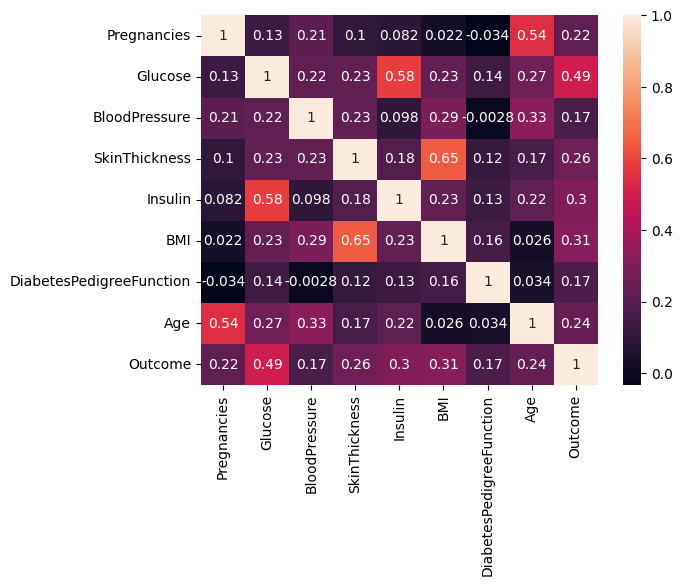

In [8]:
# Matriz de correlación
sns.heatmap(df.corr(), annot=True)
plt.show()

Como es de esperarse, la insulina, la glucosa y el BMI son relevantes en el resultado de la diabetes. Además se perciben correlaciones considerables entre la insulina y la glucosa, SkinThickness y BMI; y edad y embarazos.

La insulina, la glucosa y el BMI son claves para entender la diabetes.
Correlaciones en la matriz: Existe relación entre:
Insulina y glucosa
Espesor de piel y BMI
Edad y embarazos
Datos faltantes: Muchos valores de insulina y espesor de piel son 0 (marcados como NaN).
Método MICE: Usado para "parchear" datos faltantes con estimaciones.
Medidas de centralidad: Usadas para reemplazar otros valores 0.

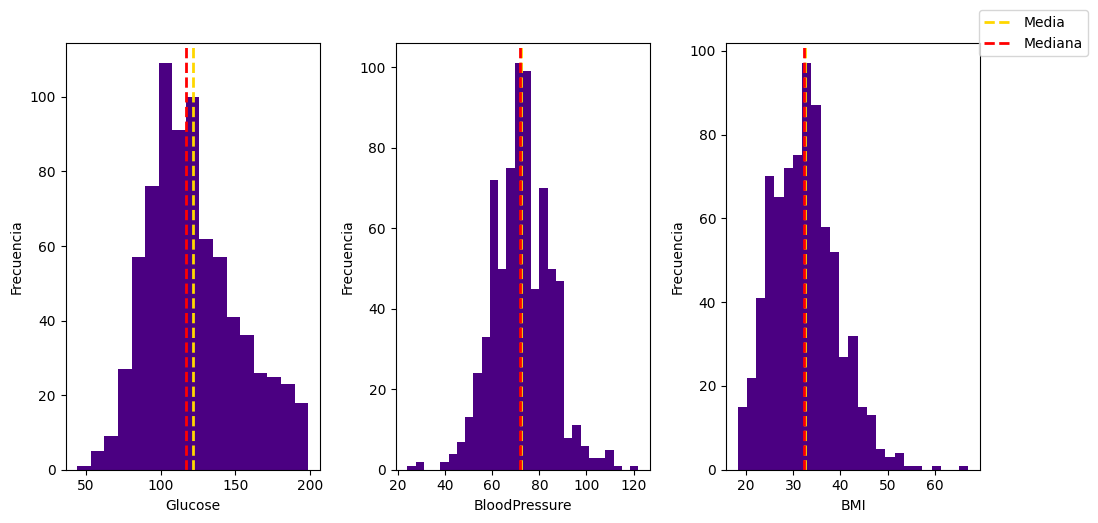

In [9]:
# Reemplazo de valores NaN de la Glucosa, BloodPressure y BMI
columna = ['Glucose', 'BloodPressure', 'BMI']
medias, medianas = [[] for _ in range(2)]

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)

# Histogramas para decidir si la mediana, la media o la moda representa a la muestra
for j in range(3):
  plt.subplot(1, 3, j+1)
  plt.hist(df[columna[j]], bins='auto', color='indigo')

  # Medidas de centralidad
  media = df[columna[j]].mean()
  mediana = df[columna[j]].median()
  # Se agregan a sus respectivas listas
  medias.append(media)
  medianas.append(mediana)

  # Ploteo
  plt.xlabel(columna[j])
  plt.ylabel('Frecuencia')
  plt.axvline(x = media, color = 'gold', linestyle='--', linewidth=2)
  plt.axvline(x = mediana, color = 'r', linestyle='--', linewidth=2)

# Leyenda
fig.legend(bbox_to_anchor=(1.1, 1.05), labels=['Media','Mediana'])
plt.tight_layout()
plt.show()

En base a esto se propone cambiar los valores NaN por:
<table>
<thead>
<tr>
<th>Columna</th>
<th>Reemplazo por</th>
</tr>
</thead>
<tbody>
<tr>
<td>Glucose</td>
<td>Mediana</td>
</tr>
<tr>
<td>BloodPressure</td>
<td>Mediana</td>
</tr>
<tr>
<td>BMI</td>
<td>Mediana</td>
</tr>
</tbody>
</table>

In [10]:
# Reemplazo de dichos valores
reemplazos = {'Glucose': medianas[0], 'BloodPressure': medianas[1],'BMI': medianas[2]}
df.replace(np.nan, reemplazos, inplace=True)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.153420,155.548223,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,10.476982,118.775855,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Veamos los boxplots en búsqueda de ver si no hay alguna falla.

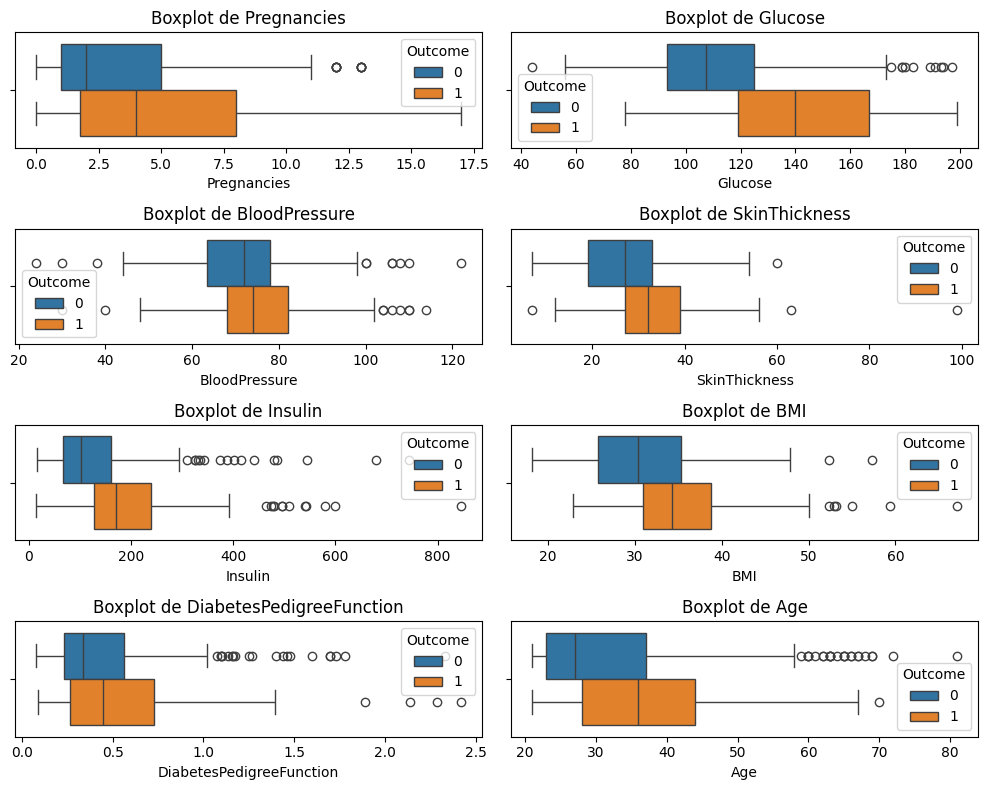

In [12]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, x=column, hue='Outcome')
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

Se considera que una SkinThickness de casi 100mm no es posible y valores de insulina arriba de 600 son poco probables. Por ello se decide eliminar estos datos.

In [13]:
df.drop(df[(df['Insulin'] > 600) | (df['SkinThickness'] > 90)].index, inplace=True)

La decisión de no seguir sacando posibles outliers viene dada por considerar que hace falta información del tipo y técnicas del muestro. Así mismo como una comprensión más profunda (con un experto en el área de la medicina) de los tipos de datos para poder evaluar qué es outlier y qué no.

## Porcentaje de diabéticos

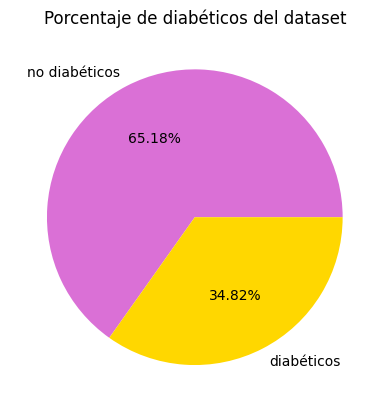

In [14]:
plt.pie(df['Outcome'].value_counts(), labels=['no diabéticos','diabéticos'], autopct='%1.2f%%', colors=['orchid', 'gold'])
plt.title(label="Porcentaje de diabéticos del dataset")
plt.show()

Queremos un modelo que supere ampliamente el 65% de accuracy, sino sería un modelo que no aporta nada.

## ¿La glucosa tiene una distribución normal?

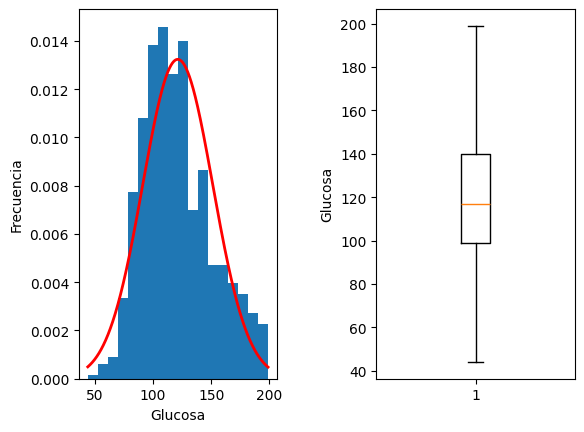

In [15]:
# Veamos un histograma y boxplot
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.5)

plt.subplot(1, 2, 1)
plt.hist(df['Glucose'], bins='auto', density=True)
x_axis = np.arange(df.Glucose.min(), df.Glucose.max(), 0.1)
plt.plot(x_axis, norm.pdf(x_axis, df.Glucose.mean(), df.Glucose.std()), linewidth=2, color='r')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.boxplot(df['Glucose'])
plt.ylabel('Glucosa')

plt.show()

El histograma da con una cola más pesada a izquierda (cae más rápidamente). <br>

Por otro lado, el boxplot da un resultado un poco asimétrico, la mediana no queda tan centrado como debería.
Pros: los brazos son parecidos.

Figure(640x480)


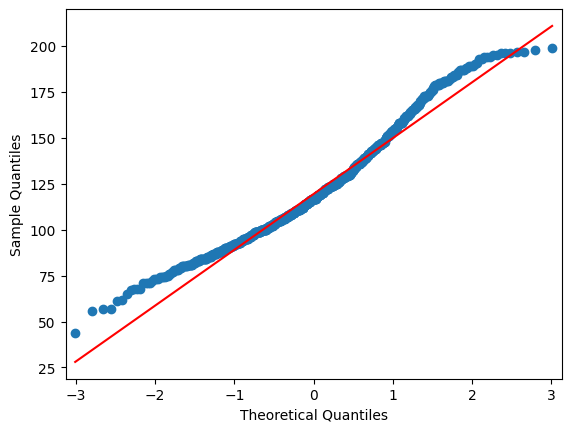

In [16]:
# Haré un qqplot
print(sm.qqplot(df['Glucose'], line='q'))

Efectivamente, se tiene una cola pesada a izquierda y liviana a derecha (aunque abrupta). Podríamos concluir que la glucosa no tiene una distribución normal.

Veamos un test de hipótesis para corroborar que no tiene una distribución normal.

In [17]:
# Shapiro-Wilk test para ver si corresponde a una distribución normal
shapiro(df['Glucose'])

ShapiroResult(statistic=0.9708458302906495, pvalue=3.2781890917199054e-11)

El p-valor es muy chiquito, para cualquier nivel de significación aceptable se rechazaría la hipótesis nula de que la distrubición de la glucosa es normal.

Sin embargo, separando por diabéticos y no diabéticos se tiene una distribución más normal:

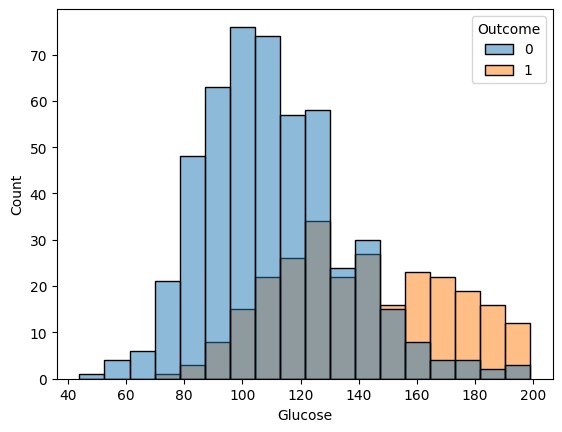

In [18]:
sns.histplot(data=df,x='Glucose',hue='Outcome')
plt.show()

In [19]:
# Test de normalidad
print('test de Shapiro en las personas NO diabéticas: \n p-valor =', shapiro(df.loc[df["Outcome"] == 0, "Glucose"])[1])
print('test de Shapiro en las personas diabéticas: \n p-valor =', shapiro(df.loc[df["Outcome"] == 1, "Glucose"])[1])

test de Shapiro en las personas NO diabéticas: 
 p-valor = 7.03190582333357e-07
test de Shapiro en las personas diabéticas: 
 p-valor = 0.00011859609586134484


Volviendo a hacer el Shapiro-Wilk test obtenemos un resultado mejor pero aún así no se tiene normalidad para un nivel de significación razonable.

##¿Cuál es el máximo número de embarazos?

In [20]:
df['Pregnancies'].max()

17

¡Una mujer tuvo 17 embarazos! ¿Es posible? Veamos su edad:

In [21]:
df[df['Pregnancies']==df['Pregnancies'].max()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1


La edad no nos descarta la posibilidad de 17 embarazos. Se decide mantener el dato.

## ¿La presión arterial tiene una distribución normal?

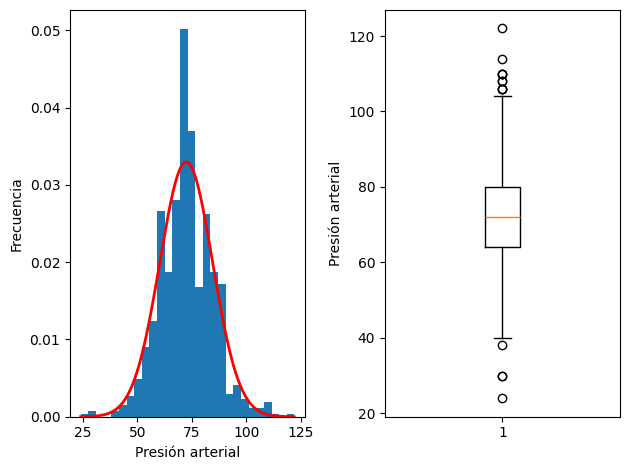

In [22]:
# Veamos un histograma
plt.subplot(1, 2, 1)
plt.hist(df['BloodPressure'], bins='auto', density=True)

# Ploteo de una normal usando la media y desvío de la BloodPressure
x_axis = np.arange(df.BloodPressure.min(), df.BloodPressure.max(), 0.1)
plt.plot(x_axis, norm.pdf(x_axis, df.BloodPressure.mean(), df.BloodPressure.std()), linewidth=2, color='r')

# Etiquetas
plt.xlabel('Presión arterial')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['BloodPressure'])
plt.ylabel('Presión arterial')
plt.tight_layout()
plt.show()

Tiene un compartamiento nada parecido a la de una normal, con muchos datos atípicos.

In [23]:
# Rango intercuartil
IQR = stats.iqr(df['BloodPressure'])
print(IQR)

16.0


Comrpobando con el test de Shapiro-Wilk:

In [24]:
# Test de normalidad
print(shapiro(df['BloodPressure']))

ShapiroResult(statistic=0.9878106892185791, pvalue=5.538599986946148e-06)


Se concluye que los datos no vienen de una distribución normal.

## Dispersión de los datos para descubrir patrones

Veamos la dispersión de los datos separados por diabéticos y no diabéticos:

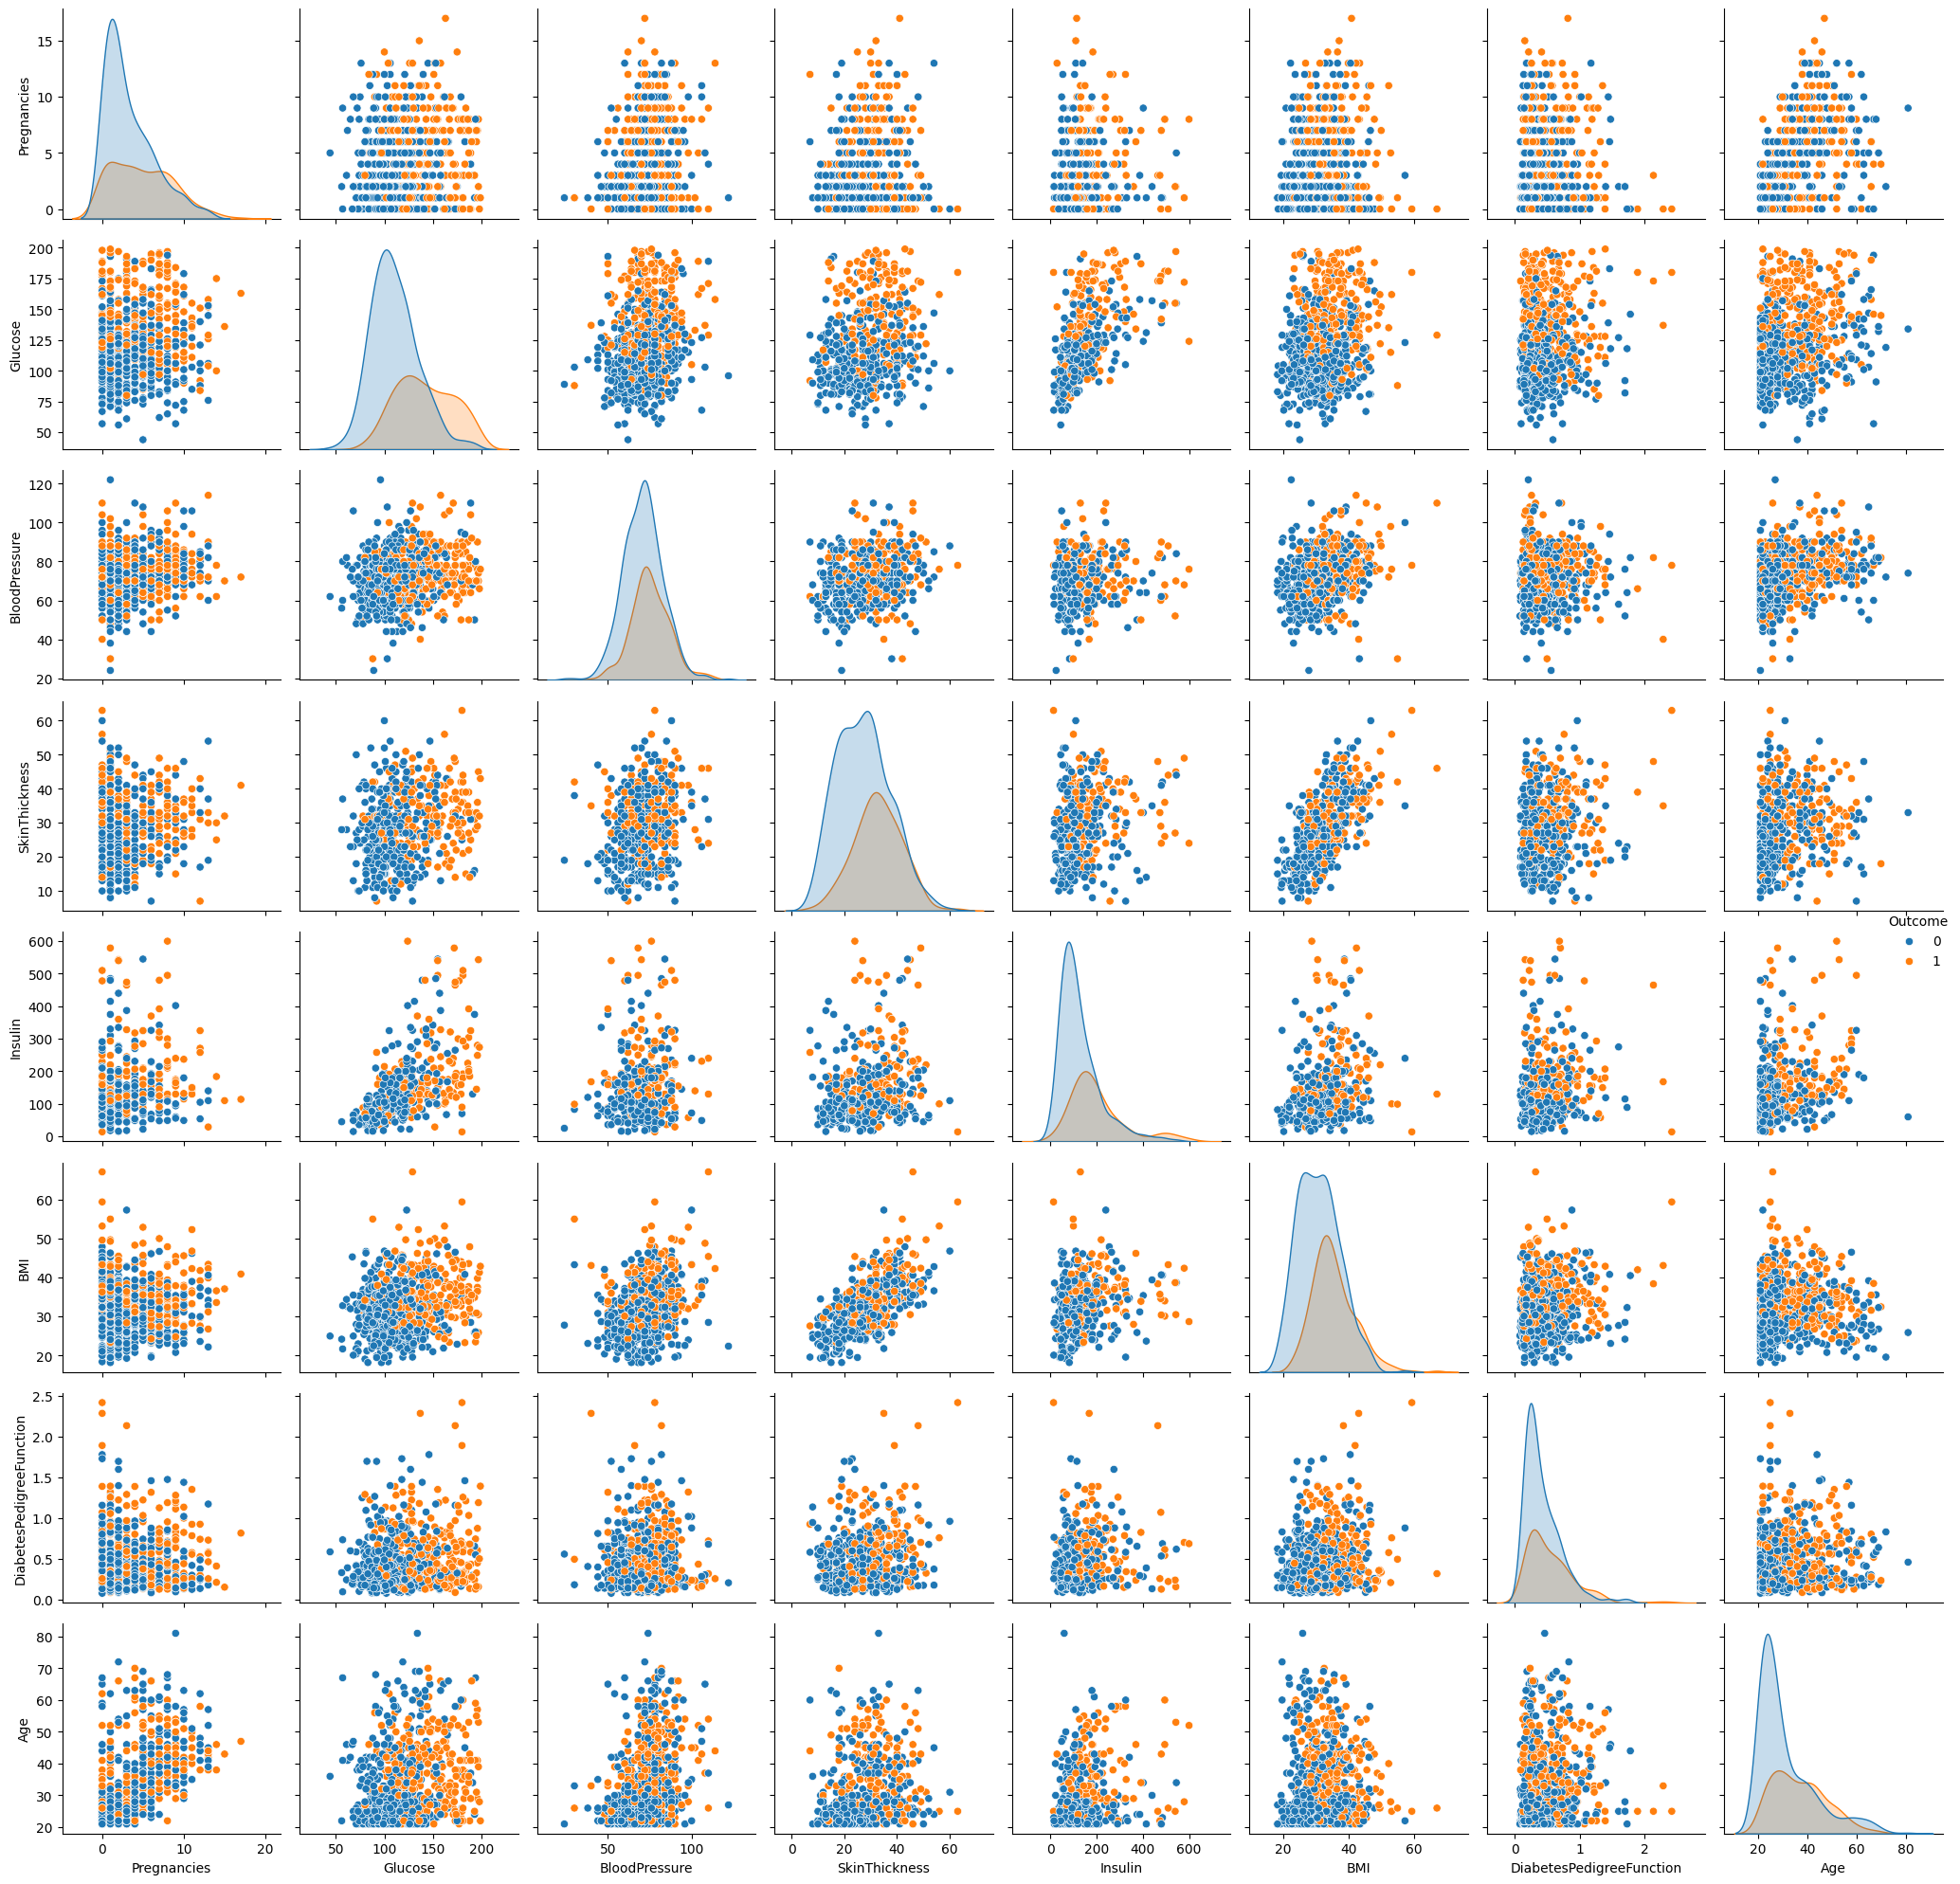

In [25]:
sns.pairplot(df, hue='Outcome')
plt.tight_layout()
plt.show()

Se ve la tendencia clara que a mayor nivel de Glucosa más tendencia a ser diabético. Con el BMI y la Glucosa los sets de diabéticos y no diabéticos se notan un poco más definidos.

# Última etapa del preprocesamiento

In [26]:
train_data = df.copy()
train_label = train_data.pop('Outcome')

Mantendremos la proporcionalidad (de diabético y no diabéticos) en los distintos conjuntos. Por eso se usa stratify.

In [27]:
# Se separa los datos en 3 pares de sets: training, validation data y test
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, train_size = .8, shuffle=True,
                                                    random_state=seed, stratify=train_label)

X_train, X_val, y_train, y_val = train_test_split(X_train,  y_train, train_size = .8, shuffle=True,
                                                 random_state=seed, stratify=y_train)

training_complete = pd.concat([X_train, y_train], axis=1)

## Método Mice al conjunto de entrenamiento

Se lo va a aplicar sólo al conjunto de entrenamiento, en el resto de conjuntos se van a eliminar los datos NaN.

In [28]:
# Eliminación de datos NaN en los conjuntos de testeo y validación
na_indices_test = X_test[X_test.isna().any(axis=1)].index
X_test.dropna(inplace=True)
y_test.drop(index=na_indices_test, inplace=True)

na_indices_val = X_val[X_val.isna().any(axis=1)].index
X_val.dropna(inplace=True)
y_val.drop(index=na_indices_val, inplace=True)

In [29]:
# Aplicar IterativeImputer (MICE)
imputer = IterativeImputer(max_iter=10, random_state=seed)
imputed_data = imputer.fit_transform(training_complete)
training_complete = pd.DataFrame(imputed_data, columns=training_complete.columns)

Chequeemos que los datos fueron asignados acorde.

In [30]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,488.000000,488.000000,488.000000,340.000000,249.000000,488.000000,488.000000,488.000000
mean,3.901639,121.823770,72.274590,29.738235,151.867470,32.842418,0.462951,32.879098
std,3.395636,29.656377,12.167314,9.890209,108.783942,7.003814,0.316859,11.409844
min,0.000000,56.000000,24.000000,8.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,22.000000,76.000000,27.875000,0.244000,24.000000
50%,3.000000,118.000000,72.000000,30.000000,125.000000,32.450000,0.370000,29.000000
75%,6.000000,140.250000,80.000000,37.000000,190.000000,36.975000,0.624750,39.250000
max,17.000000,197.000000,122.000000,63.000000,545.000000,67.100000,2.420000,81.000000


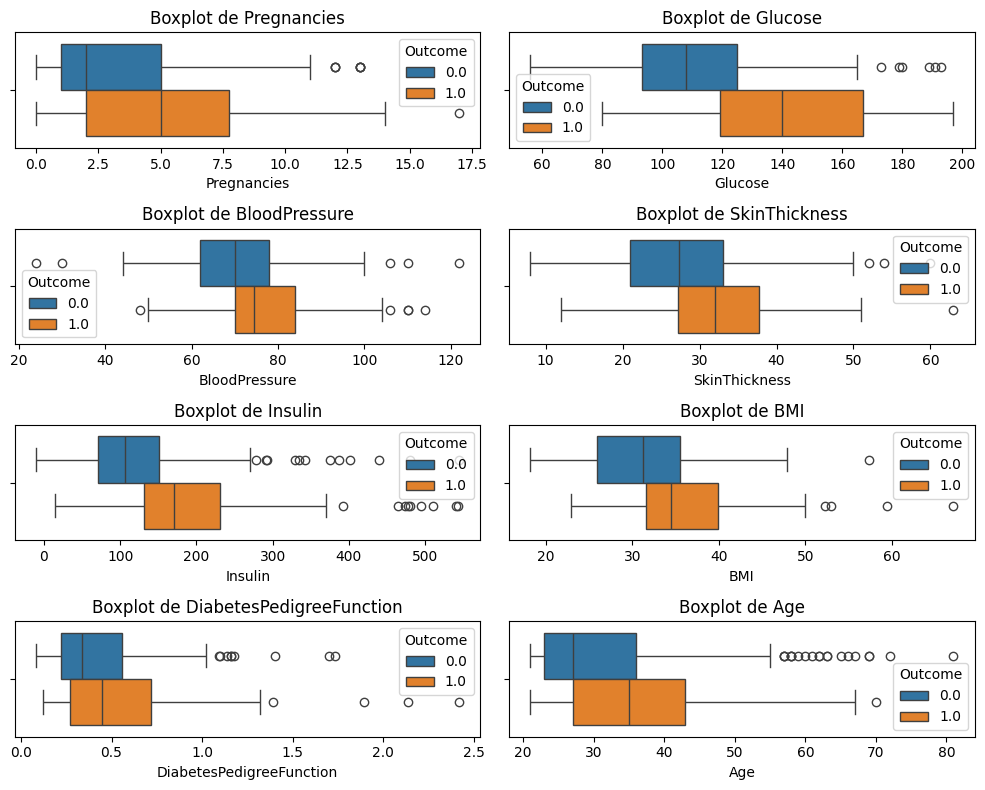

In [31]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(X_train.columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=training_complete, x=column, hue='Outcome')
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [32]:
y_train_sin_oversampling = training_complete.pop('Outcome')
X_train_sin_oversampling = training_complete

## Oversampling al conjunto de entrenamiento

Tratemos de equilibrar las clases de diabéticos y no diabéticos. Para ello haremos un bootstrap en la clase de diabéticos SOLO para el conjunto de entrenamiento. Habrá más riesgo de sobrefiteo.

In [33]:
ros = RandomOverSampler(random_state=seed)
X_train, y_train = ros.fit_resample(X_train_sin_oversampling, y_train_sin_oversampling)

## Disminución de la dimensionalidad en busca de patrones (sólo para visualizar)

La varianza explicada es de: [0.92115587 0.04361261]


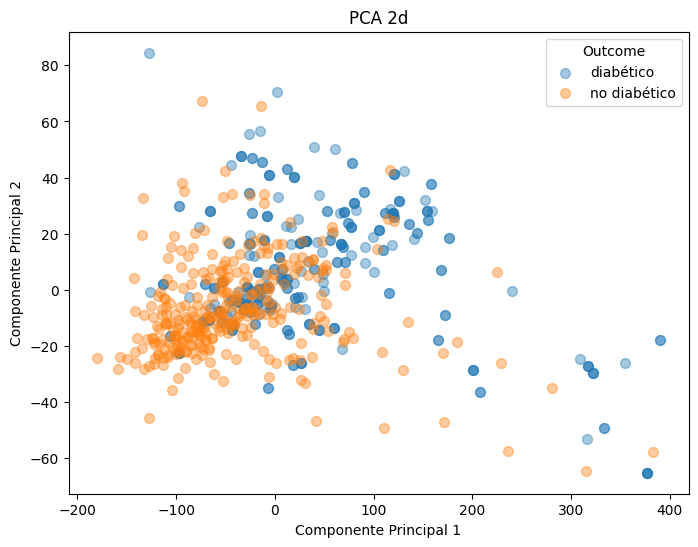

In [34]:
# Aplicar PCA para reducir a 2 dimensiones
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(X_train)

# Visualización
plt.figure(figsize=(8, 6))
outcome_texto = {0: 'no diabético', 1:'diabético'}
for outcome in y_train.unique():
    subset = components_2d[y_train == outcome]
    plt.scatter(subset[:, 0], subset[:, 1], label=outcome_texto[outcome], s=50, alpha=0.4)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA 2d')
plt.legend(title='Outcome')
print('La varianza explicada es de:', pca_2d.explained_variance_ratio_)
plt.show()

Muy buena varianza explicada, arriba del 96%. Se puede llegar a ver secciones en las que predominan mayormente los no diabéticos.

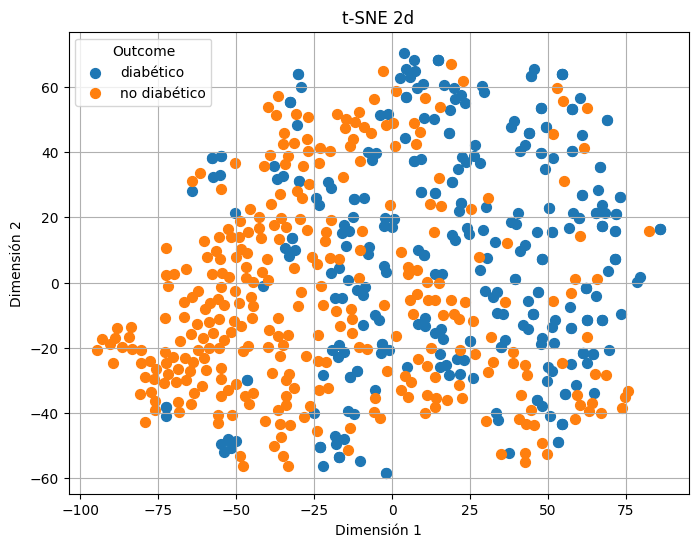

In [35]:
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=seed)
components_tsne = tsne.fit_transform(scaled_data)

# Visualización
plt.figure(figsize=(8, 6))
outcome_texto = {0: 'no diabético', 1:'diabético'}
for outcome in y_train.unique():
    subset = components_tsne[y_train == outcome]
    plt.scatter(subset[:, 0], subset[:, 1], label=outcome_texto[outcome], s=50)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('t-SNE 2d')
plt.legend(title='Outcome')
plt.grid()
plt.show()

t-SNE reduce dimensionalidad mientras trata de mantener distancias cercanas entre los datos que se aproximan y distancias más largas entre los datos que no se aproximan.<br>
Se ven los sectores de diabéticos y no diabéticos más diferenciados así, principalmente el sector no diabético.

Aclaración: es preferible tener mayor recall (poder clasificar bien a la gente que está enferma) por ello se ajustará al threshold adecuado para cada modelo.

# Usando redes neuronales

## Reescalado de valores

In [36]:
Scaler = StandardScaler()

Scaler.fit(X_train)
X_train_escalado = Scaler.transform(X_train)
X_val_escalado = Scaler.transform(X_val)
X_test_escalado = Scaler.transform(X_test)

## Búsqueda en grilla para hallar el mejor modelo de red neuronal

In [37]:
custom_threshold = 0.5
def model_builder(hp):
  # Número de neuronas en la primera y segunda capa
  hp_units_1 = hp.Int('units_1', min_value=32, max_value=152, step=32)
  hp_units_2 = hp.Int('units_2', min_value=32, max_value=152, step=32)

  model = keras.Sequential([
      keras.layers.Dense(hp_units_1, input_shape=[X_train.shape[1],], activation='relu'),
      keras.layers.Dropout(0.2),
      # Para normalizar las activaciones
      keras.layers.BatchNormalization(),
      keras.layers.Dense(hp_units_2, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  # Variación del learning rate
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy", dtype=None, threshold=custom_threshold),
                         tf.keras.metrics.Precision(thresholds=custom_threshold, name='precision'),
                         tf.keras.metrics.Recall(thresholds=custom_threshold, name='recall'),
                         tf.keras.metrics.AUC(name='auc')]
              )

  return model

In [38]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective("val_auc", direction="max"),
                     max_epochs=10,
                     factor=3,
                     seed=seed)

# Vamos a ponerle un stop para no sobre-entrenar, que pare cuando la val_loss no siga bajando
patience = 5
stop_early = tf.keras.callbacks.EarlyStopping(
    start_from_epoch=2, # dejar correr al menos 2 épocas
    min_delta=0.001, # mínima cantidad que cuenta como mejora
    patience=patience, # épocas antes de parar
    restore_best_weights=True # se queda con los mejores pesos antes de no decrecer más
)

Reloading Tuner from .\untitled_project\tuner0.json


In [39]:
# Búsqueda de los mejores hiperparámetros
tuner.search(X_train_escalado, y_train, epochs=50, validation_data=(X_val_escalado, y_val), callbacks=[stop_early])

# Hiperparámetros óptimos
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
El número óptimo de neuronas en la primera capa es de {best_hps.get('units_1')}.
El número óptimo de neuronas en la segunda capa es de {best_hps.get('units_2')}.
El learning rate óptimo es {best_hps.get('learning_rate')}.
""")


El número óptimo de neuronas en la primera capa es de 96.
El número óptimo de neuronas en la segunda capa es de 32.
El learning rate óptimo es 0.001.



## Entreno la mejor red

In [40]:
# Esta clase servirá para el modelo de Ensemble, por eso se aplica ahora
class TFNeuralNetwork(BaseEstimator, ClassifierMixin):
    def __init__(self, input_shape, threshold=0.5):
        self.input_shape = input_shape
        self.model = self._build_model()
        self.threshold = threshold
        self.history = None
        self.callbacks = [stop_early]

    def _build_model(self):
        model = tuner.hypermodel.build(best_hps)
        return model

    def fit(self, X, y, batch_size=200, epochs=80, verbose=0, *args, **kwargs):
        self.history = self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=self.callbacks, *args, **kwargs)
        return self.history

    def predict(self, X):
        pred_probs = self.model.predict(X, verbose=0)
        return (pred_probs > self.threshold).astype("int32")

    def predict_proba(self, X):
        pred_probs = self.model.predict(X, verbose=0)
        return np.hstack([1 - pred_probs, pred_probs])

In [41]:
model_red_neuronal = TFNeuralNetwork(input_shape=(X_train.shape[1],), threshold=custom_threshold)

In [42]:
# Entreno el modelo, ya tiene el callback asignado
history = model_red_neuronal.fit(X_train_escalado, y_train, batch_size=200, epochs=70,
                                 validation_data=(X_val_escalado, y_val), verbose=1)

Epoch 1/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.5488 - auc: 0.5707 - loss: 0.8241 - precision: 0.5464 - recall: 0.5548 - val_accuracy: 0.7857 - val_auc: 0.8986 - val_loss: 0.6110 - val_precision: 0.6429 - val_recall: 0.9000
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6427 - auc: 0.6925 - loss: 0.6642 - precision: 0.6384 - recall: 0.6515 - val_accuracy: 0.8036 - val_auc: 0.9125 - val_loss: 0.5739 - val_precision: 0.6800 - val_recall: 0.8500
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6587 - auc: 0.7382 - loss: 0.6209 - precision: 0.6528 - recall: 0.6730 - val_accuracy: 0.7857 - val_auc: 0.9160 - val_loss: 0.5446 - val_precision: 0.6818 - val_recall: 0.7500
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6820 - auc: 0.7826 - loss: 0.5617 - precision: 0.6749 - recall: 0.6980 - val_accuracy: 0.7857 - val_auc: 0.9181 - val_loss: 0.5212 - val_precision: 0.6818 - val_recall: 0.7500
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms

Última Validation Loss: 0.3887 
Última Validation Accuracy: 0.8393 
Última Validation Precision: 0.7391 
Última Validation Recall: 0.8500


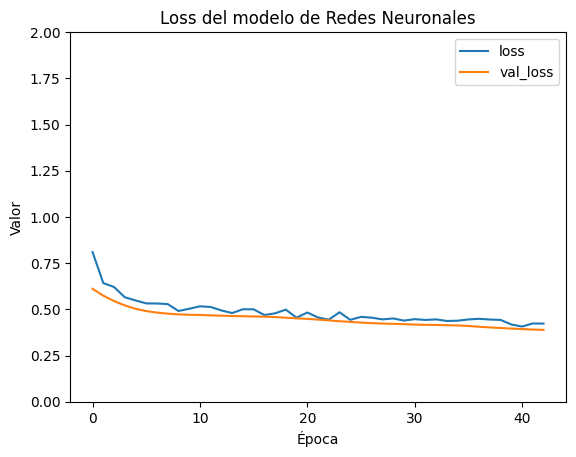

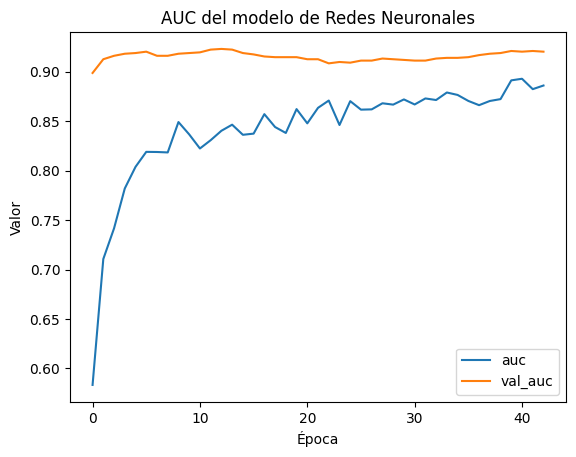

In [43]:
# Ploteo de la loss y el auc
history_df = pd.DataFrame(history.history)[:-patience]
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title('Loss del modelo de Redes Neuronales')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.ylim((0,2))
history_df.loc[:, ['auc', 'val_auc']].plot()
plt.title('AUC del modelo de Redes Neuronales')
plt.xlabel('Época')
plt.ylabel('Valor')

print(("Última Validation Loss: {:0.4f} \n" +\
      "Última Validation Accuracy: {:0.4f} \n" +\
      "Última Validation Precision: {:0.4f} \n" +\
      "Última Validation Recall: {:0.4f}") \
      .format(history_df["val_loss"].iloc[-1],
              history_df["val_accuracy"].iloc[-1],
              history_df["val_precision"].iloc[-1],
              history_df["val_recall"].iloc[-1]))

No parece haber overfitting ni underfitting.

## Elección del threshold

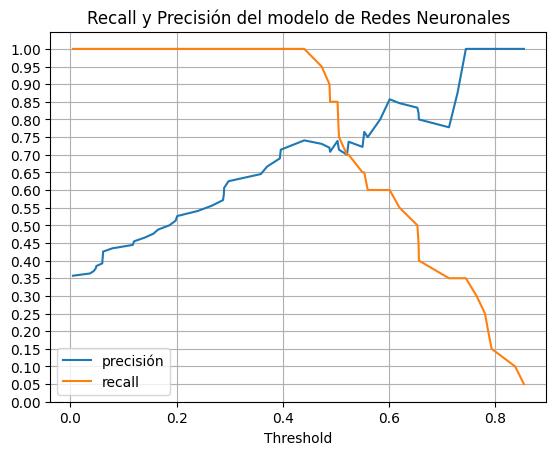

In [44]:
# Ploteo de la recall y precisión en base al threshold
prob = model_red_neuronal.predict_proba(X_val_escalado)[:,1]
precision, recall, thresholds = precision_recall_curve(y_val, prob)  # Se le pueden pasar probabilidades
plt.plot(thresholds, precision[:-1], label='precisión')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.yticks(np.linspace(0, 1, num=21))
plt.title('Recall y Precisión del modelo de Redes Neuronales')
plt.show()

Viendo el gráfico hay un punto que tiene una buena recall (de 0.9) y buena precision (alrededor de 0.7). Averiguemos qué punto es:

In [45]:
# Se define una recall mínima que se quiere y de ahí se saca el threshold
recall_min = 0.9
custom_threshold = thresholds[np.argmin(recall >= recall_min)]
print(f'El threshold elegido es de: {custom_threshold:.2f} \n')

El threshold elegido es de: 0.49 



## Curva ROC

El área de la curva ROC es 0.9194444444444445


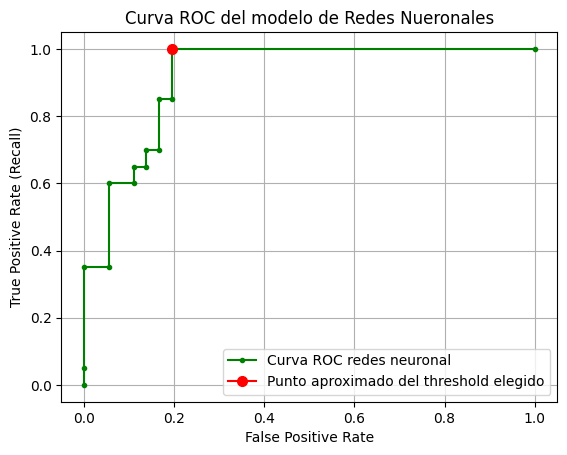

In [46]:
fper, tper, thresholds = roc_curve(y_val, prob)  # Se le pueden pasar probabilidades
roc_auc = roc_auc_score(y_val, prob)
plt.plot(fper, tper, marker='.', label='Curva ROC redes neuronal',color='g')
plt.plot(fper[np.argmax(thresholds < custom_threshold)],
         tper[np.argmax(thresholds < custom_threshold)], marker='o', markersize=7,
         color='r', label='Punto aproximado del threshold elegido')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.grid()
print('El área de la curva ROC es',roc_auc)
plt.title('Curva ROC del modelo de Redes Nueronales')
plt.show()

## Evaluación del modelo en el conjunto de testeo

In [47]:
# Realizar predicciones en los datos de prueba
pred_probabilities = model_red_neuronal.predict_proba(X_test_escalado)[:,1]

# Convertir probabilidades en etiquetas utilizando el umbral personalizado
pred_labels_custom_threshold = (pred_probabilities >= custom_threshold).astype(int)

print('Métricas en el conjunto de testeo:\n', classification_report(y_test, pred_labels_custom_threshold))

Métricas en el conjunto de testeo:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        54
           1       0.73      0.69      0.71        32

    accuracy                           0.79        86
   macro avg       0.78      0.77      0.77        86
weighted avg       0.79      0.79      0.79        86



Se obtuvo buena recall a costa de una baja en la precisión (en la clase diabética). Buena recall y precisión en la clase no diabética.

## Veamos la matriz de confusión

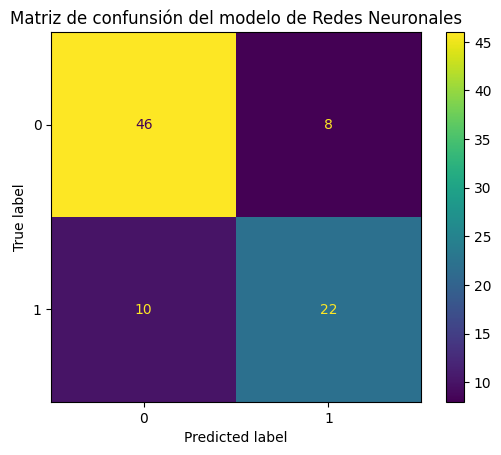

In [48]:
predicted = model_red_neuronal.predict_proba(X_test_escalado)[:,1]
predicted = (predicted > custom_threshold).astype('int')
cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.title('Matriz de confunsión del modelo de Redes Neuronales')
plt.show()

# Conclusión


precisión 0.68    recall 0.78

El programa utiliza una red neuronal totalmente conectada (MLP - Multilayer Perceptron) con dos capas ocultas y técnicas de regularización como Dropout y Batch Normalization. La red fue optimizada mediante la búsqueda de hiperparámetros usando Keras Tuner.
Desempeño: La red neuronal alcanzó un buen AUC-ROC y una alta sensibilidad (recall), lo que es fundamental en problemas de salud como la predicción de diabetes, ya que minimizar los falsos negativos es prioritario.

Regularización efectiva: El uso de Dropout y Early Stopping ayudó a prevenir el sobreajuste, permitiendo que el modelo generalizara bien en los datos de validación.

Umbral personalizado: Se ajustó el threshold para mejorar el balance entre precisión y recall, logrando un modelo más útil en la práctica clínica.